In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 150
%matplotlib inline

In [2]:
df = pd.read_excel(r"E:\Data Science\Datasets\Universities.xlsx")

In [3]:
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [4]:
df.drop(columns = 'Univ', inplace = True)

In [5]:
df

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


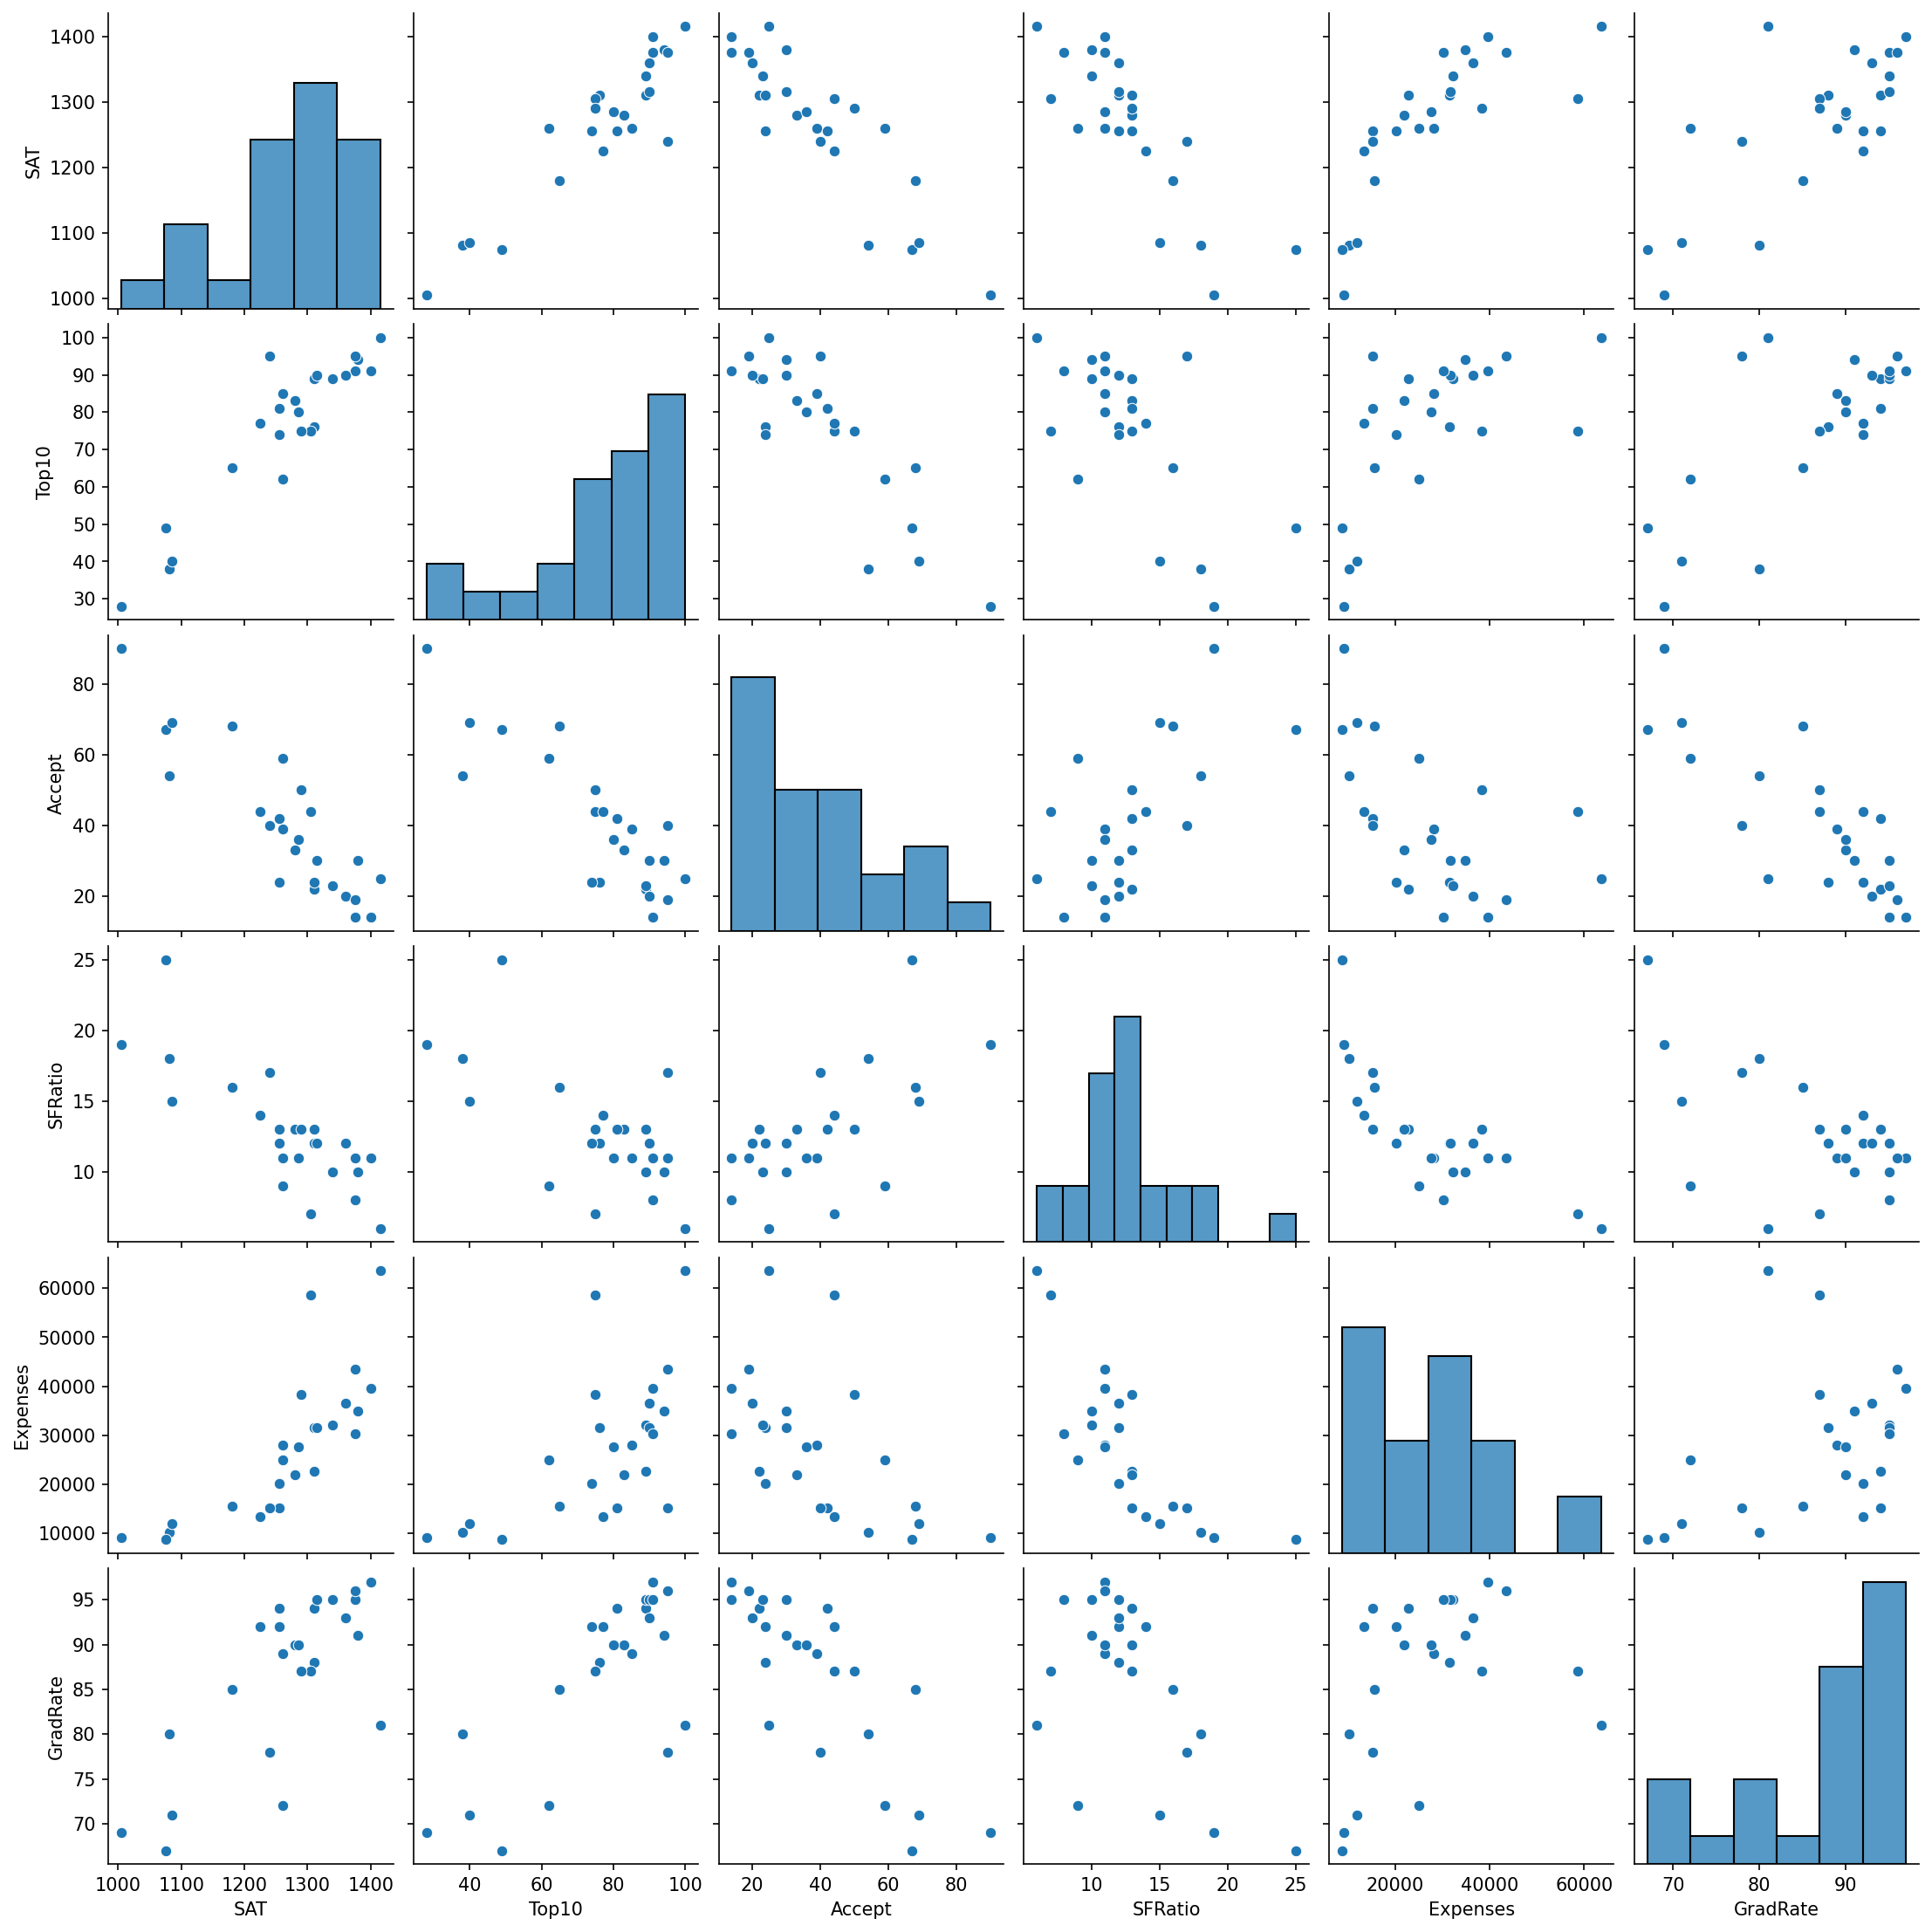

In [15]:
sns.pairplot(df)

# Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
si = StandardScaler()

x = si.fit_transform(df)
x

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [9]:
# Dendrogram with single and complete linkage

from scipy.cluster import hierarchy

In [10]:
lk = hierarchy.linkage(x, method = 'single')

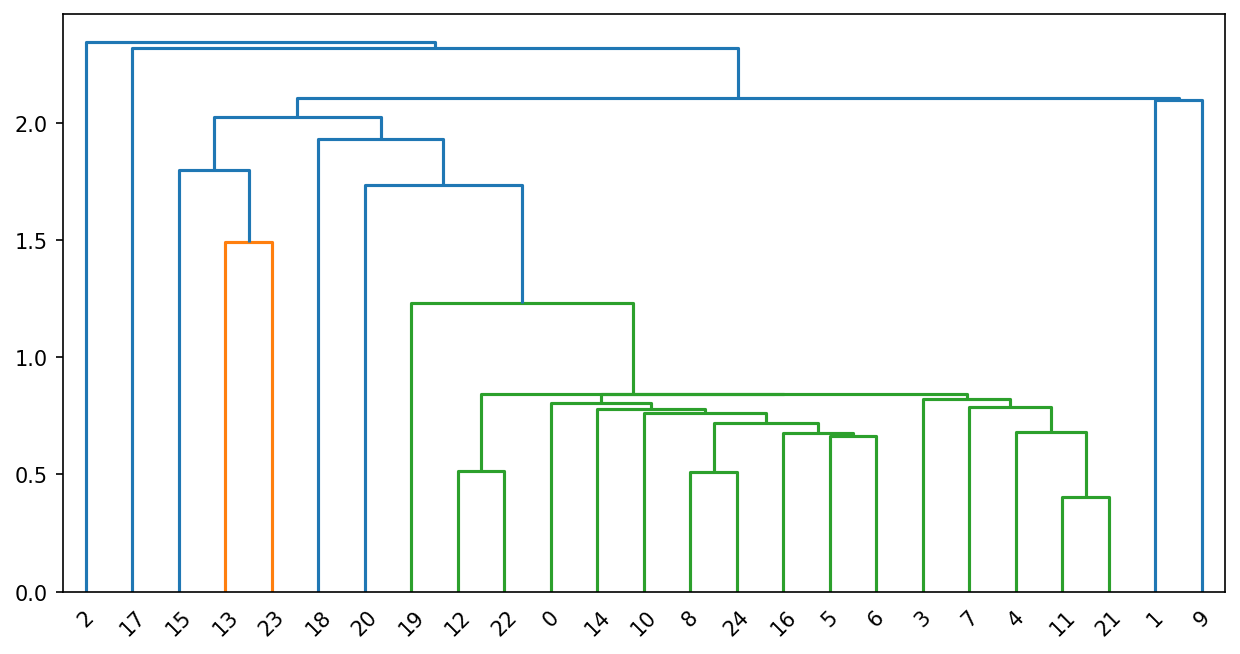

In [11]:
dendrogram = hierarchy.dendrogram(lk)

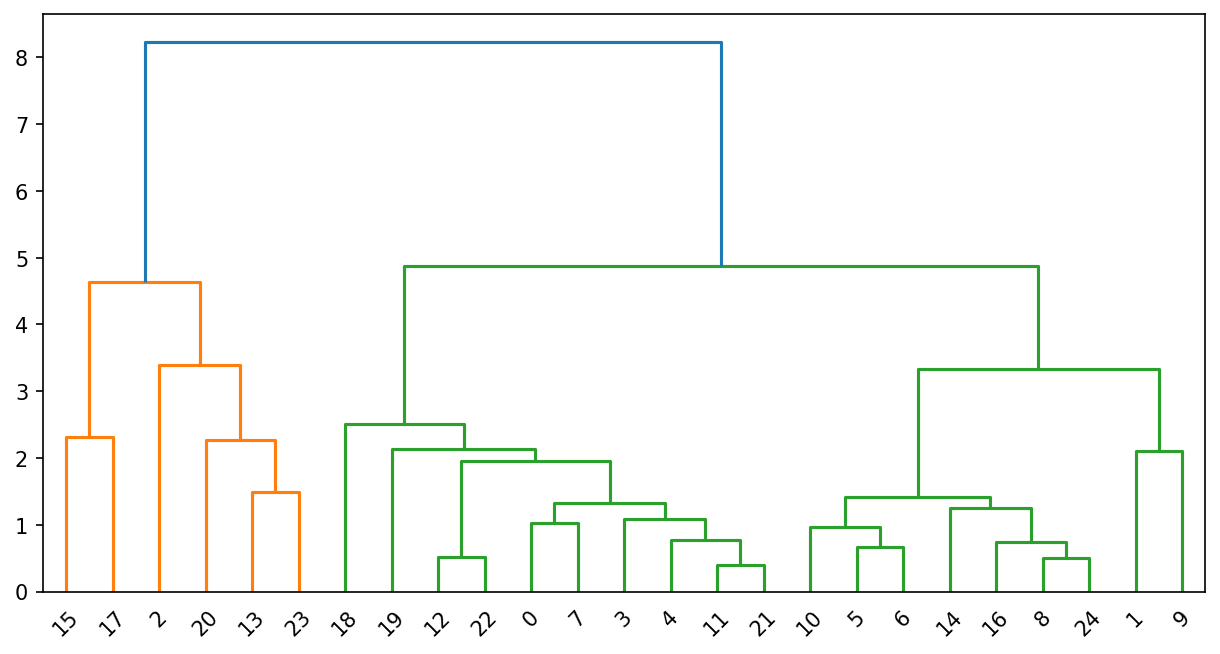

In [12]:
lk = hierarchy.linkage(x, method = 'complete')
dendrogram = hierarchy.dendrogram(lk)

# Model Building

In [13]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
hc = AgglomerativeClustering(n_clusters=2)
y_pred = hc.fit_predict(x)

In [18]:
df['Cluster'] = y_pred
df

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
0,1310,89,22,13,22704,94,0
1,1415,100,25,6,63575,81,0
2,1260,62,59,9,25026,72,0
3,1310,76,24,12,31510,88,0
4,1280,83,33,13,21864,90,0
5,1340,89,23,10,32162,95,0
6,1315,90,30,12,31585,95,0
7,1255,74,24,12,20126,92,0
8,1400,91,14,11,39525,97,0
9,1305,75,44,7,58691,87,0


In [20]:
# Analyzing the clusters

df.groupby('Cluster').agg('mean')

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Cluster,,,,,,
0,1305.47619,83.666667,33.333333,11.47619,30708.952381,89.571429
1,1061.50000,38.750000,70.000000,19.25000,9953.000000,71.750000


<Axes: xlabel='Top10', ylabel='Expenses'>

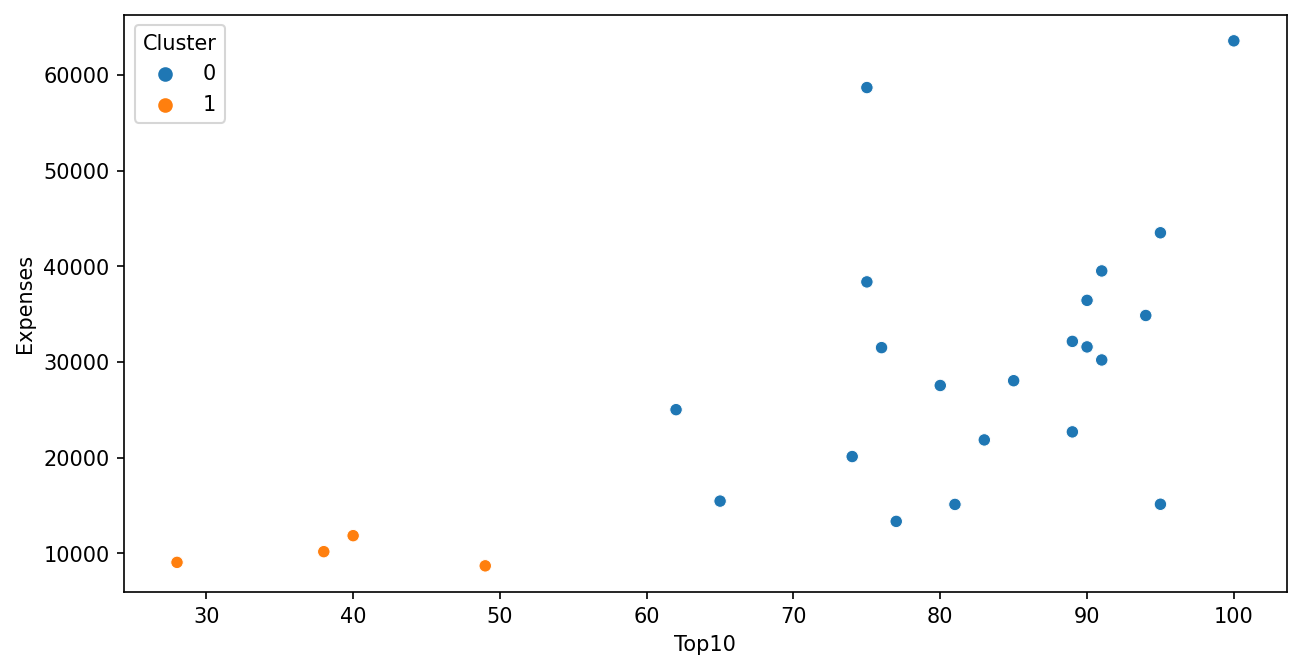

In [22]:
sns.scatterplot(x = df['Top10'],y = df['Expenses'],hue = df['Cluster'])

# 4 Cluster

In [25]:
hc = AgglomerativeClustering(n_clusters=4)
yp = hc.fit_predict(x)
yp


array([0, 2, 0, 0, 0, 3, 3, 0, 3, 2, 3, 0, 0, 1, 3, 1, 3, 1, 0, 0, 0, 0,
       0, 1, 3], dtype=int64)

In [26]:
df['Cluster4'] = yp

In [27]:
df

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster,Cluster4
0,1310,89,22,13,22704,94,0,0
1,1415,100,25,6,63575,81,0,2
2,1260,62,59,9,25026,72,0,0
3,1310,76,24,12,31510,88,0,0
4,1280,83,33,13,21864,90,0,0
5,1340,89,23,10,32162,95,0,3
6,1315,90,30,12,31585,95,0,3
7,1255,74,24,12,20126,92,0,0
8,1400,91,14,11,39525,97,0,3
9,1305,75,44,7,58691,87,0,2


In [29]:
df.groupby('Cluster4').agg('mean')

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
Cluster4,,,,,,,
0,1262.500000,78.500000,40.083333,12.833333,22858.000000,87.583333,0.0
1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000,1.0
2,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000,0.0
3,1363.571429,91.428571,21.428571,10.571429,35475.142857,94.571429,0.0


In [31]:
df[df['Cluster4'] == 2]

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster,Cluster4
1,1415,100,25,6,63575,81,0,2
9,1305,75,44,7,58691,87,0,2


<Axes: xlabel='Top10', ylabel='Expenses'>

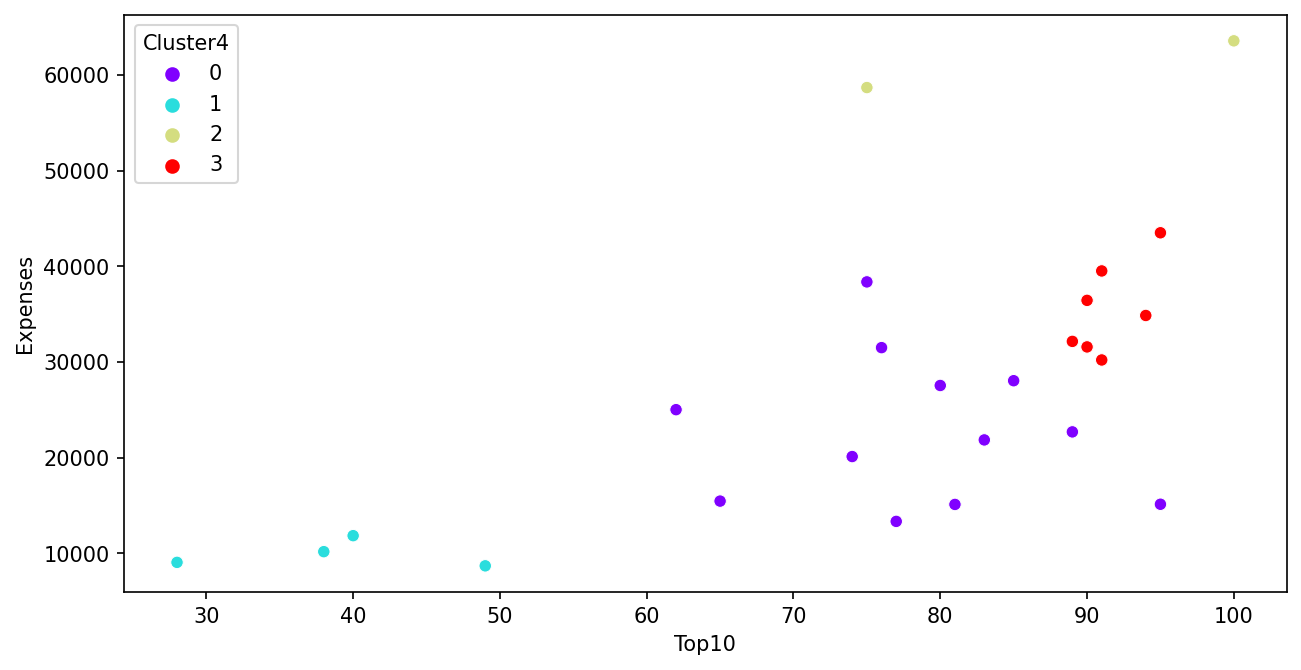

In [33]:
sns.scatterplot(x = df['Top10'], y = df['Expenses'], hue = df['Cluster4'], palette = 'rainbow')

In [35]:
df.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster,Cluster4
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000,0.160000,1.160000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778,0.374166,1.312758
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000,0.000000,0.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000,0.000000,0.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000,0.000000,1.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000,0.000000,3.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000,1.000000,3.000000


In [36]:
df.isna().sum()

SAT         0
Top10       0
Accept      0
SFRatio     0
Expenses    0
GradRate    0
Cluster     0
Cluster4    0
dtype: int64

In [41]:
x = df.iloc[:,0:5]
y = df['Cluster4']

In [39]:
from sklearn.model_selection import train_test_split

In [43]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
xtrain

,SAT,Top10,Accept,SFRatio,Expenses
9,1305,75,44,7,58691
13,1081,38,54,18,10185
1,1415,100,25,6,63575
22,1225,77,44,14,13349
5,1340,89,23,10,32162
2,1260,62,59,9,25026
12,1255,81,42,13,15122
15,1005,28,90,19,9066
3,1310,76,24,12,31510
4,1280,83,33,13,21864


In [45]:
ytrain

9     2
13    1
1     2
22    0
5     3
2     0
12    0
15    1
3     0
4     0
20    0
17    1
21    0
18    0
24    3
7     0
10    3
14    3
19    0
6     3
Name: Cluster4, dtype: int64

In [46]:
from sklearn.linear_model import LogisticRegression

In [48]:
lg = LogisticRegression()

In [49]:
lg.fit(xtrain,ytrain)

LogisticRegression()

In [50]:
ypred = lg.predict(xtest)

In [51]:
from sklearn.metrics import confusion_matrix, classification_report

In [52]:
confusion_matrix(ytest,ypred)

array([[2, 0, 0],
       [1, 0, 0],
       [0, 0, 2]], dtype=int64)

In [ ]:
sns.heatmap(confusion_matrix)